In [40]:
import os
import math
import pandas as pd

from matplotlib import pyplot as plt

From our previous exploratory data analysis, we decided to do the following preprocessing steps:
1. Crop to ROI 
2. Resize to 32x32
3. Histogram Equalization
4. Laplacian Sharpening (to enhance the edges)
4. Normalization

In [3]:
data_dir = '/home/takayuki/Desktop/sem6/DL/mini_proj_TRAFFIC/data/'
train_table = pd.read_csv(data_dir + 'Train.csv')
test_table = pd.read_csv(data_dir + 'Test.csv')

train0_dir = os.path.join(data_dir, 'Train/0')

print("Total number of images in training set: ", len(train_table))
print("Number of images in 1st class: ", len(os.listdir(train0_dir)))

Total number of images in training set:  39209
Number of images in 1st class:  210


In [4]:
roi_df = train_table[train_table['ClassId'] == 0]
target_dir = train0_dir

roi_dictionary = {}
for row in roi_df.iterrows():    
    img_path = row[1]['Path']
    img_name = img_path.split('/')[-1]
    
    roi = row[1]['Roi.X1'], row[1]['Roi.Y1'], row[1]['Roi.X2'], row[1]['Roi.Y2']
    roi_dictionary[img_name] = roi

# Preprocessing

In [51]:
from gangen.preprocess import Preprocess

preprocessor = Preprocess(
    image_dir=target_dir,
    roi_dict=roi_dictionary,
    resize_dim=(32, 32),
    do_histogram_eq=True,
    output_dir = os.path.join(data_dir, 'preprocessed', 'Train', '0'), 
)
# preprocessor.load_and_preprocess()                # Example testing  - works

Ready to preprocess images from /home/takayuki/Desktop/sem6/DL/mini_proj_TRAFFIC/data/Train/42 and save them in /home/takayuki/Desktop/sem6/DL/mini_proj_TRAFFIC/data/preprocessed/Train/0
Number of images: 240


In [52]:
for class_id in sorted(os.listdir(os.path.join(data_dir, 'Train')), key=int):
    
    target_dir = os.path.join(data_dir, 'Train', class_id)
    print("Processing class: ", class_id, "with ", len(os.listdir(target_dir)), "images")
    
    roi_df = train_table[train_table['ClassId'] == int(class_id)]
    roi_dictionary = {}
    for row in roi_df.iterrows():    
        img_path = row[1]['Path']
        img_name = img_path.split('/')[-1]

        roi = row[1]['Roi.X1'], row[1]['Roi.Y1'], row[1]['Roi.X2'], row[1]['Roi.Y2']
        roi_dictionary[img_name] = roi
    
    preprocessor = Preprocess(
        image_dir=target_dir,
        roi_dict=roi_dictionary,
        resize_dim=(32, 32),
        do_histogram_eq=True,
        output_dir = os.path.join(data_dir, 'preprocessed', 'Train', str(class_id)), 
        verbose=False
    )
    preprocessor.load_and_preprocess()            # Uncomment to regenerate preprocessed images
    

Processing class:  0 with  210 images
Processing class:  1 with  2220 images
Processing class:  2 with  2250 images
Processing class:  3 with  1410 images
Processing class:  4 with  1980 images
Processing class:  5 with  1860 images
Processing class:  6 with  420 images
Processing class:  7 with  1440 images
Processing class:  8 with  1410 images
Processing class:  9 with  1470 images
Processing class:  10 with  2010 images
Processing class:  11 with  1320 images
Processing class:  12 with  2100 images
Processing class:  13 with  2160 images
Processing class:  14 with  780 images
Processing class:  15 with  630 images
Processing class:  16 with  420 images
Processing class:  17 with  1110 images
Processing class:  18 with  1200 images
Processing class:  19 with  210 images
Processing class:  20 with  360 images
Processing class:  21 with  330 images
Processing class:  22 with  390 images
Processing class:  23 with  510 images
Processing class:  24 with  270 images
Processing class:  25

# Results - Before and After Preprocessing

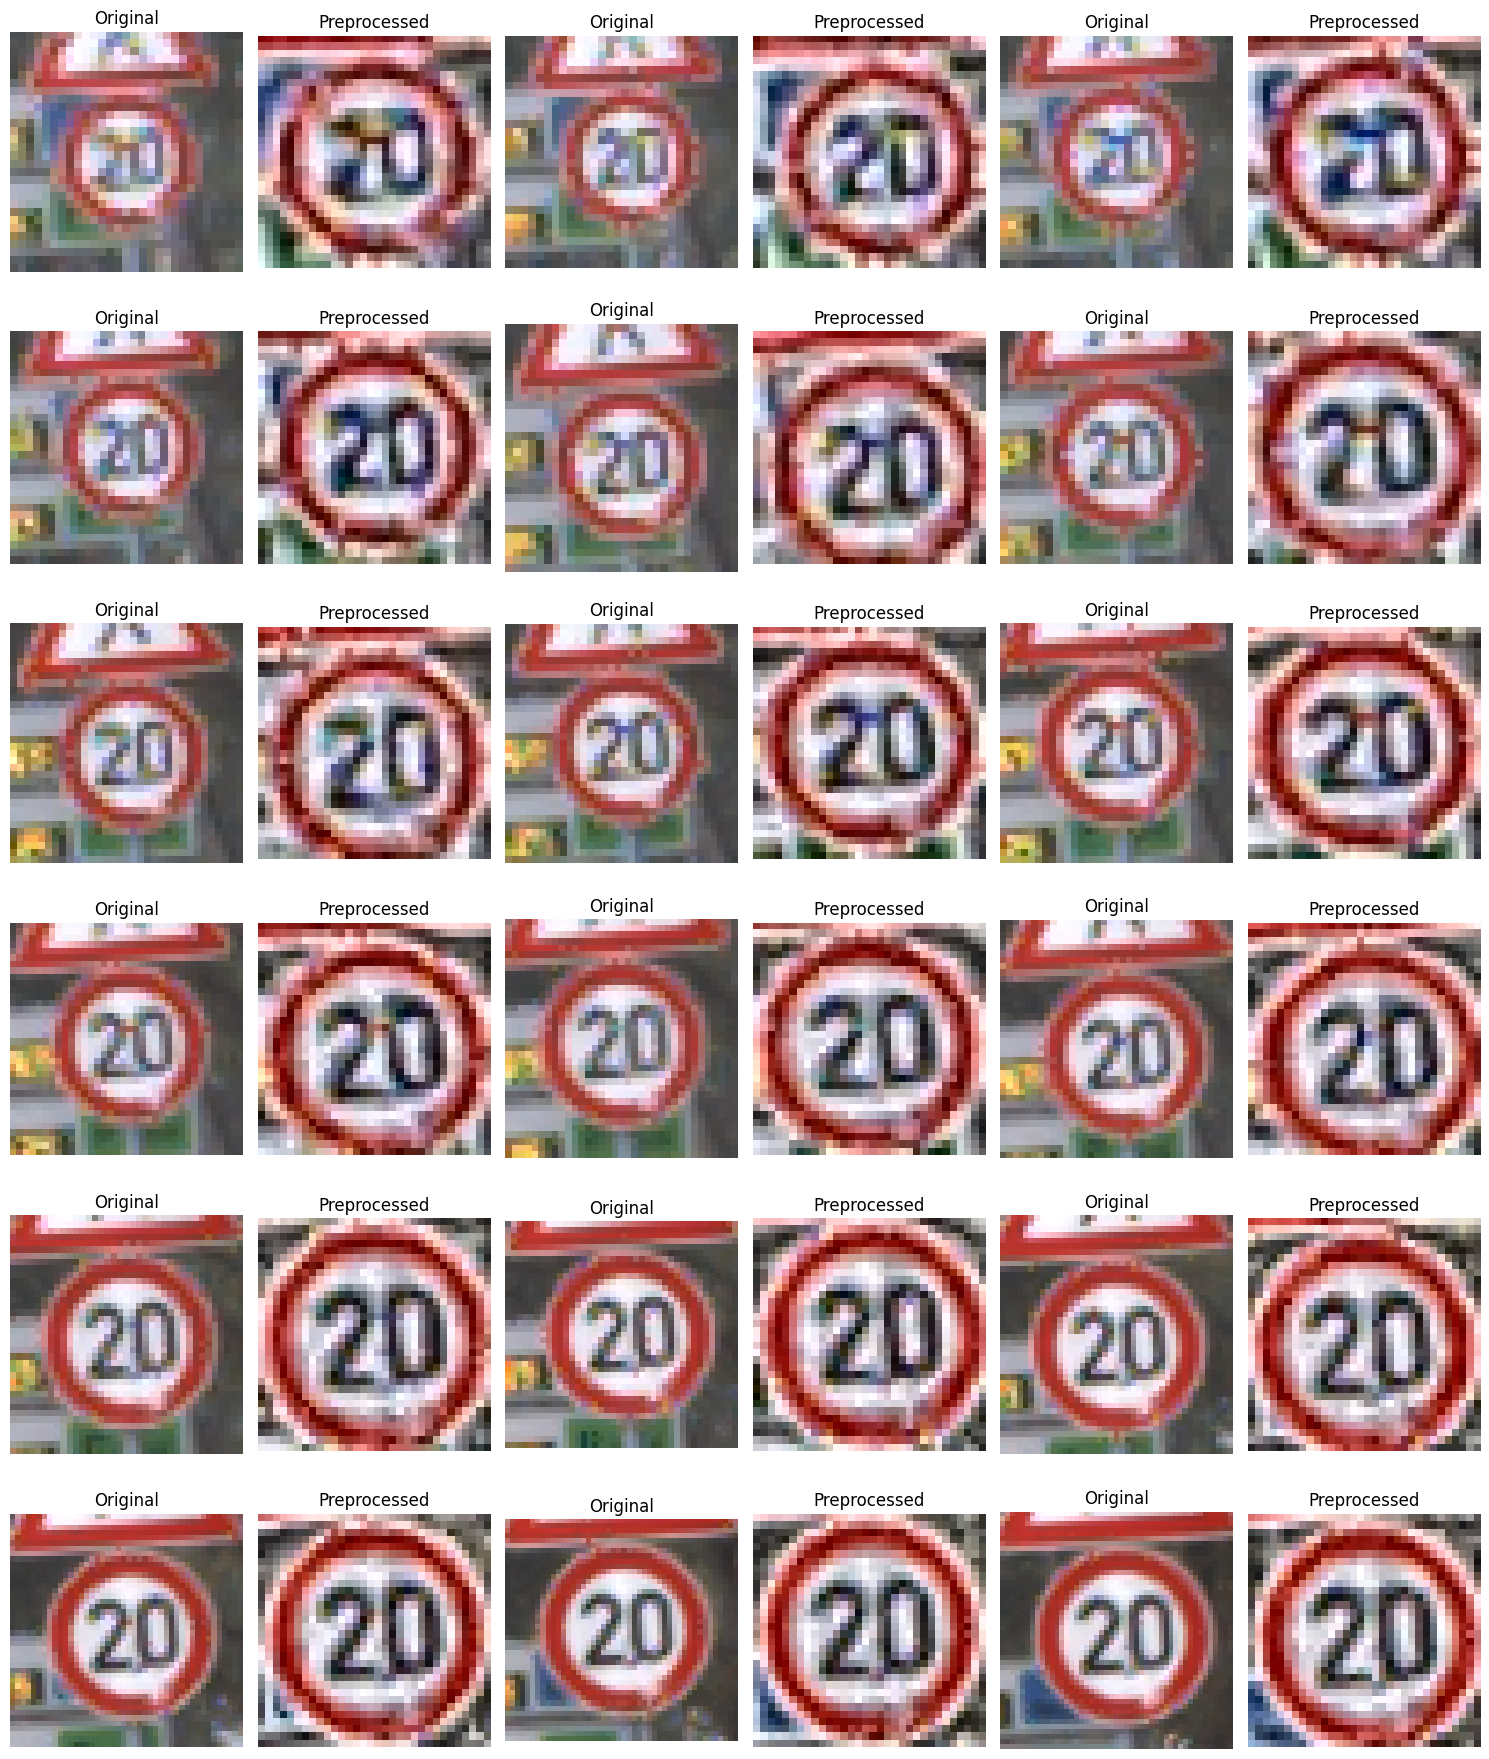

In [53]:
def visualize_preprocessing(class_id, num_images=36):

    class_dir = os.path.join(data_dir, 'Train', str(class_id))  # 
    class_preprocessed_dir = os.path.join(data_dir, 'preprocessed', 'Train', str(class_id))  


    num_cols = 6  
    num_rows = math.ceil(num_images / 3)  

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows)) 

    original_files = sorted(os.listdir(class_dir))[:num_images]
    preprocessed_files = sorted(os.listdir(class_preprocessed_dir))[:num_images]

    for i in range(num_images):
        row = i // 3  
        col = (i % 3) * 2  

        img_original = plt.imread(os.path.join(class_dir, original_files[i]))
        img_preprocessed = plt.imread(os.path.join(class_preprocessed_dir, preprocessed_files[i]))

        axes[row, col].imshow(img_original)
        axes[row, col].set_title("Original")
        axes[row, col].axis("off")

        axes[row, col + 1].imshow(img_preprocessed)
        axes[row, col + 1].set_title("Preprocessed")
        axes[row, col + 1].axis("off")

    for j in range(num_images, num_rows * 3):
        row = j // 3
        col = (j % 3) * 2
        axes[row, col].axis("off") 
        axes[row, col + 1].axis("off")  

    plt.tight_layout()
    plt.show()

visualize_preprocessing(0, num_images=18)  


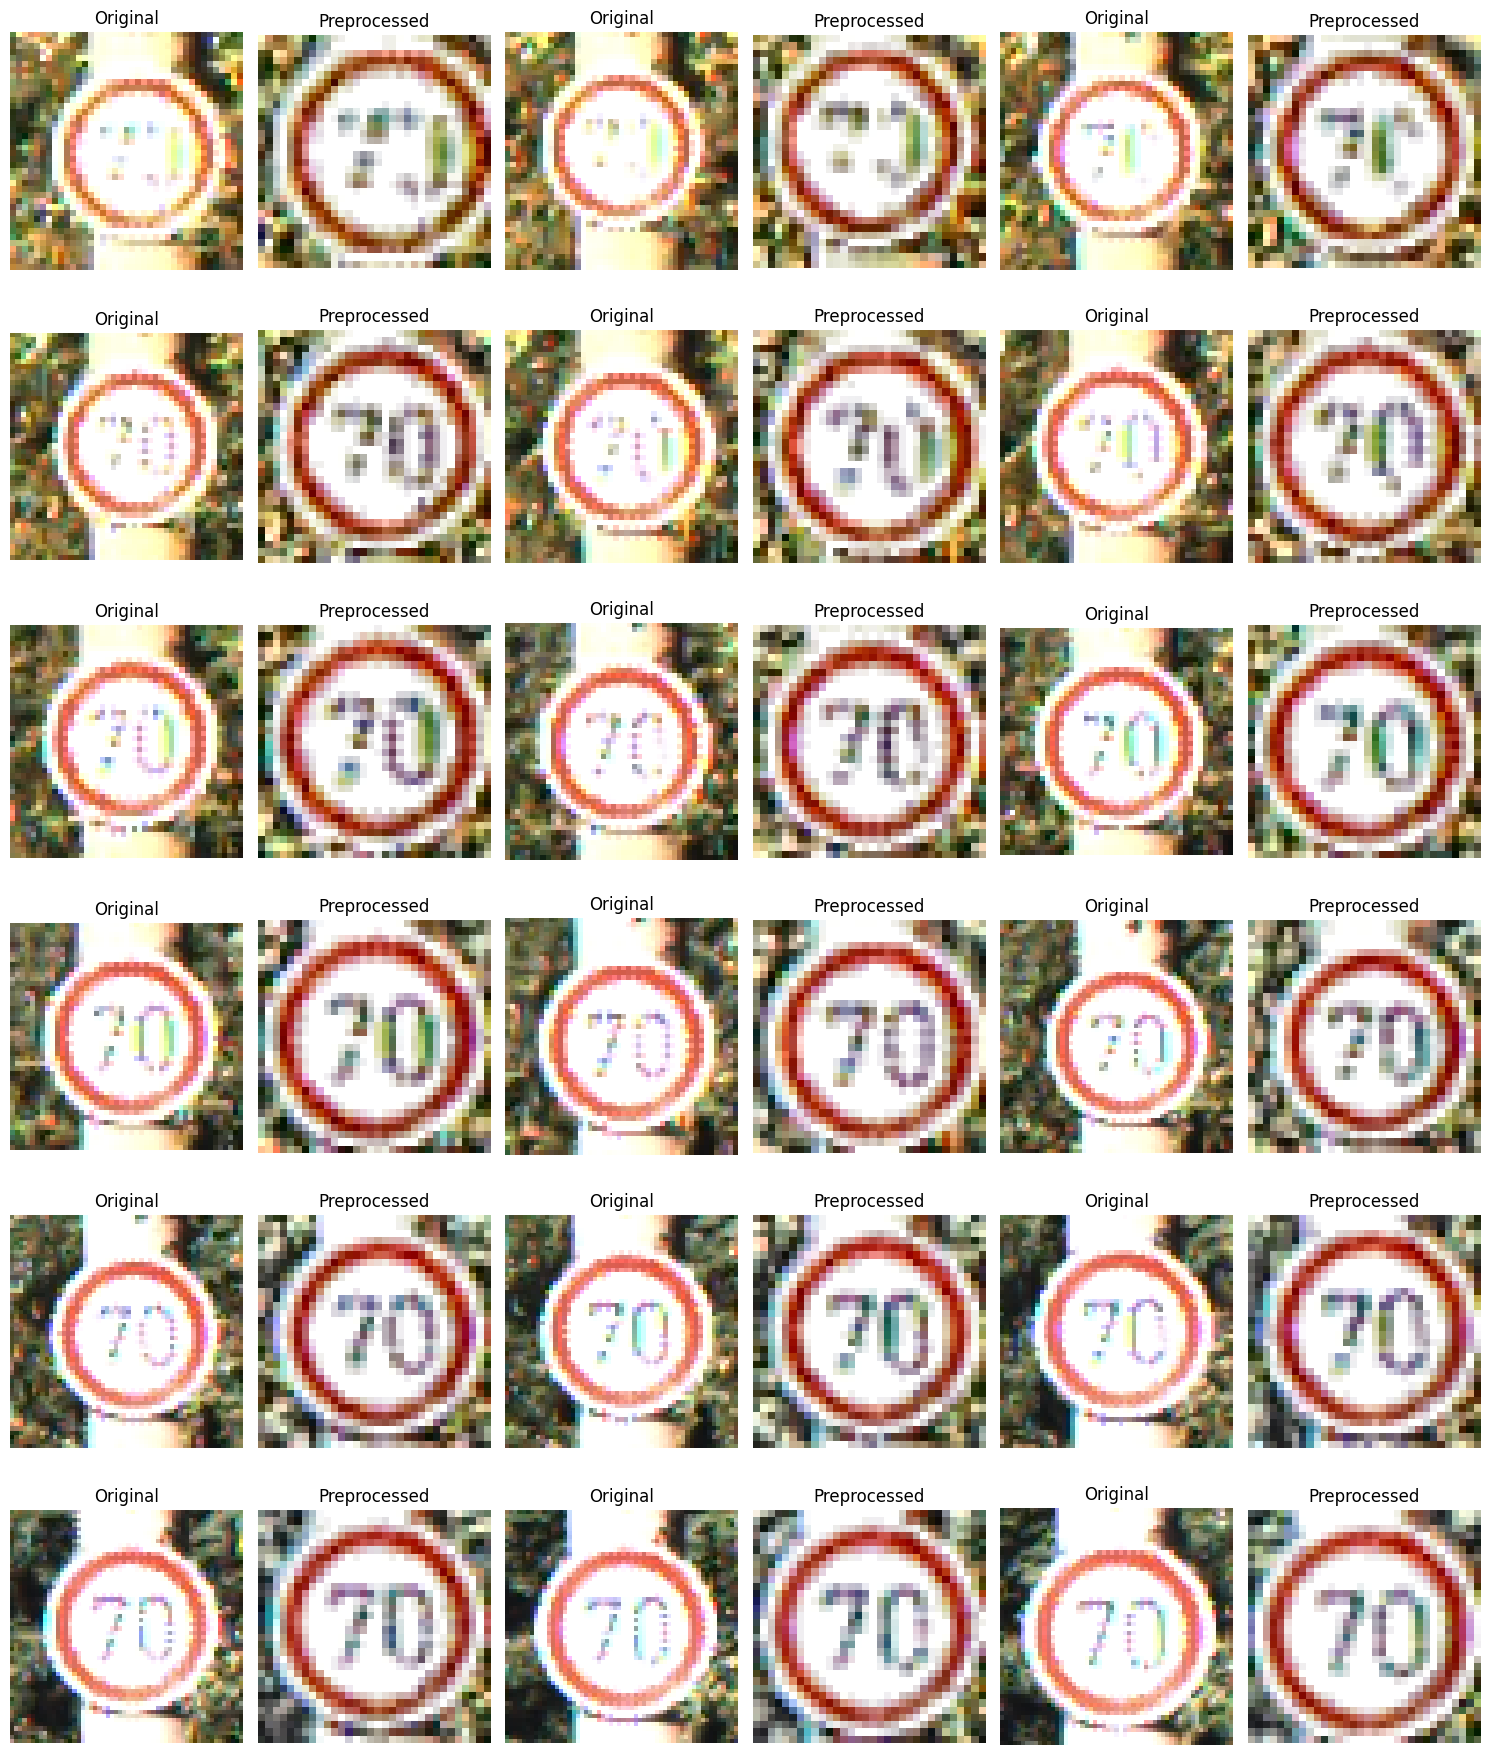

In [59]:
visualize_preprocessing(4, num_images=18)

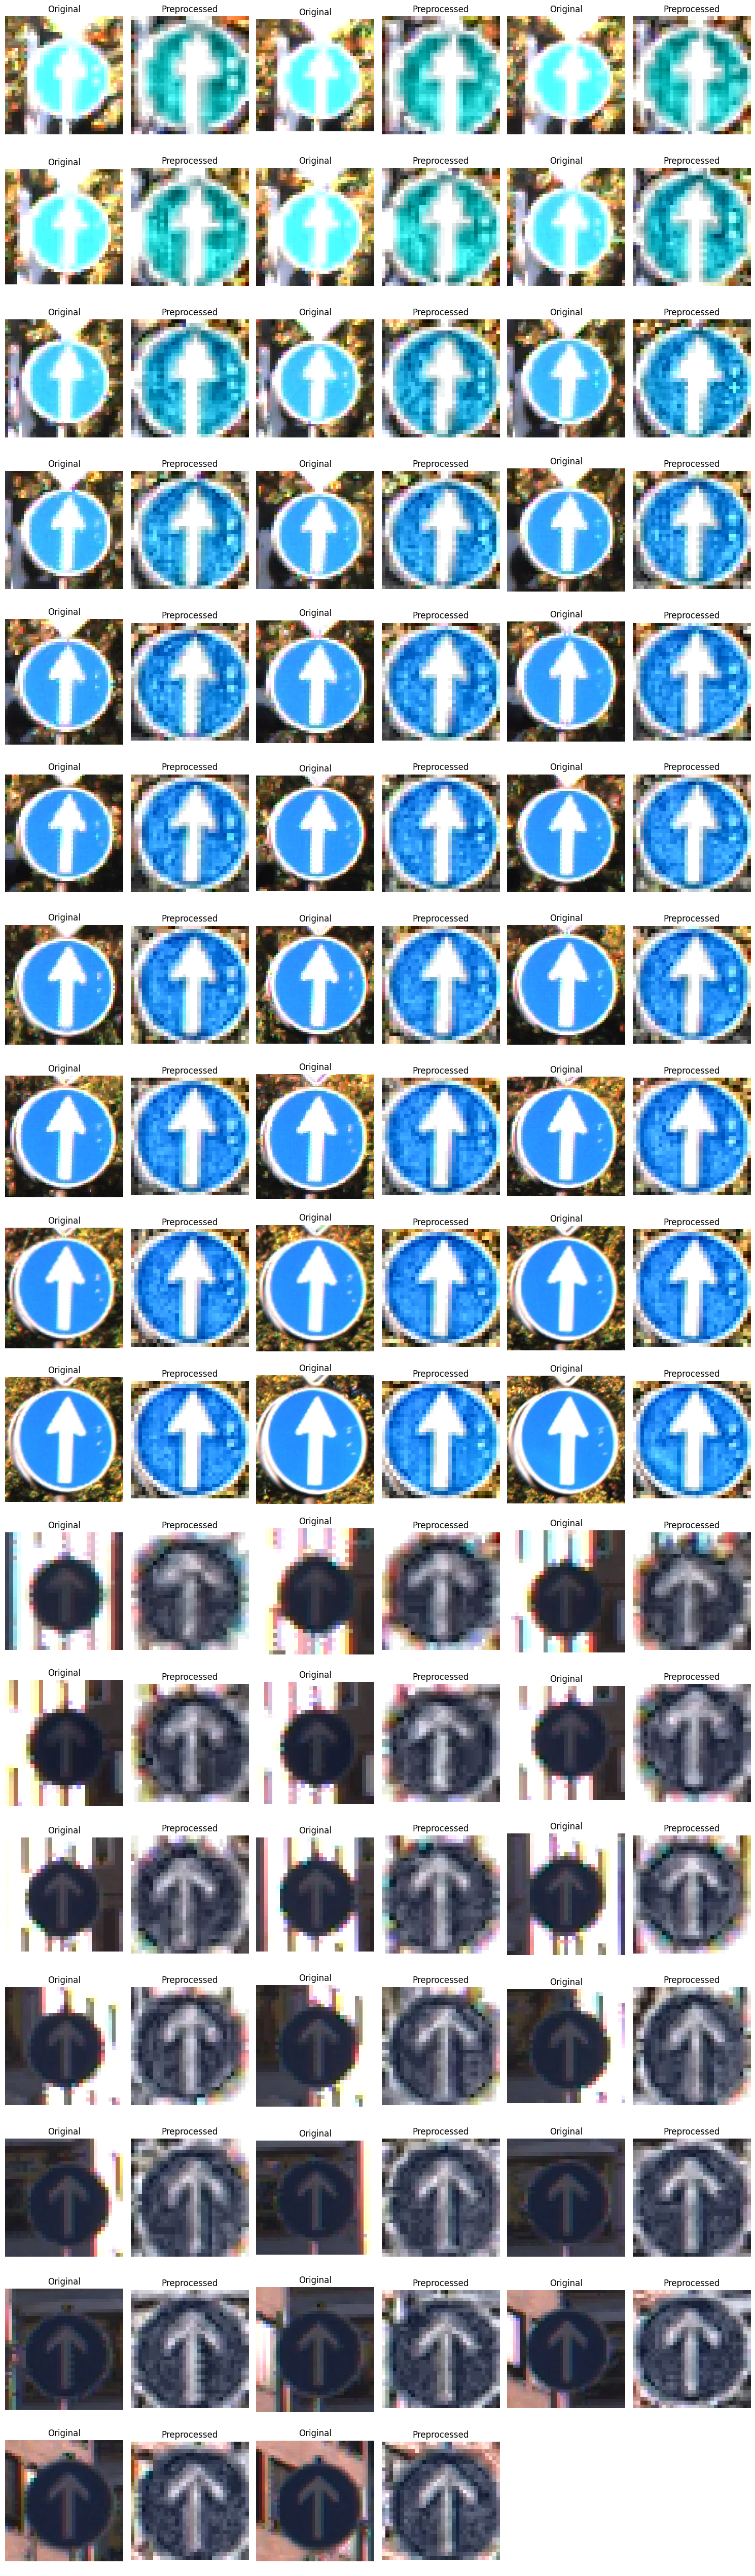

In [58]:
visualize_preprocessing(35, num_images=50)

- Future preprocessing things that could be added
    1. Unsharp Masking
    2. Overlay Canny Edges
    3. Color Matching
    4. Noise Reduction